### This file locates the datapoints situated near the edges of the clusters, as well as the noisy datapoints.
#### Reason 1: The outer points are the most crucial in the training dataset. In the case when the training dataponts are too many to include all, we should first find these edge points and make sure they are included in the training data!
#### Reason 2: Finding and excluding the noisy datapoints should result in a cleaner training process with a better end model!

In [2]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

## Load dataset

In [5]:
def load_data(path, max_rows = 300000):
    """
    Load the training data
    
    Arguments:  rows -> Maximum number of rows to load from the dataset.
    
    Return:     * Pandas dataframe, duplicates removed and reshuffled along the vertical axis. 

    """
    df = pd.read_csv(path, header=None, sep=',')
    df.columns = ['B1', 'C1', 'A2', 'B2', 'C2', 'ma_B1', 'ma_C1', 'ma_A2', 'ma_B2', 'ma_C2', 'labels_y']
    df = df.drop_duplicates()
    df = df.sample(frac = 1)
    df = df.reset_index(drop=True)
    labels_y = df['labels_y']
    df = df.drop(columns=['labels_y'])
#     df = df.drop(columns=[ 'A2', 'B2', 'C2', 'ma_B1', 'ma_C1', 'ma_A2', 'ma_B2', 'ma_C2','labels_y']) # delete this line

    return df[:max_rows], labels_y[:max_rows]

In [7]:
# file_path  = r'G:\DATAcomplete3.TXT'
file_path  = r'..\..\DATA\newerrrr_DATA\DELETE_THIS\my_training_set.txt'
train_data, labels_y = load_data(file_path, max_rows = 3000000)

X = np.r_[train_data]
# labels_y = np.r_[labels_y].reshape((-1,1))

# labels_y.shape

## Initial plot

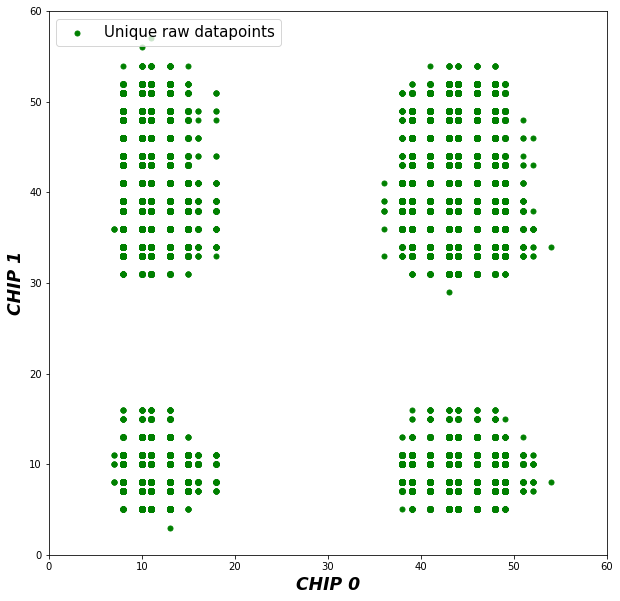

In [45]:
plt.figure(figsize=(10,10))

column1 = 0
column2 = 1

data = plt.scatter(X[:, column1], X[:, column2], c='green', s=25, edgecolors='green')
# HT = plt.scatter(X_outliers[:, column1], X_outliers[:, column2], c='red', s=1, edgecolors='red')

plt.axis('tight')
plt.xlim((0, 60))
plt.ylim((0, 60))

plt.legend([data], ["Unique raw datapoints"], loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=15))

# plt.xlabel(
#     "Errors train: %d/%d ; "
#     "Errors novel regular: %d/%d ; "
#     "Errors novel abnormal: %d/%d"
#     % (n_error_train, n_train_rows ,n_error_test, n_test_rows, n_error_outliers, n_outliers_rows))
plt.xlabel("CHIP {}".format(column1), fontsize='xx-large', fontstyle='oblique', fontweight='bold')
plt.ylabel("CHIP {}".format(column2), fontsize='xx-large', fontstyle='oblique', fontweight='bold')

plt.show()

## Find pseude edge points

In [7]:
def find_edge_points(dataframe):
    X = dataframe
    clustering = DBSCAN(eps=5, min_samples=60).fit(X)
    labels = clustering.labels_                         # cluster group of every point
    core_ind = clustering.core_sample_indices_          # indices of core points
    arr1 = np.arange(len(X))                            # indices of all points
    arr2 = labels!= -1                                  # indices of core and edge points
    arr3 = np.setdiff1d(arr1,core_ind)                  # indices of edge and noise points
    
    # Edge indices
    edge_ind = [idx for idx in arr3 if clustering.labels_[idx]!= -1] # edge_ind = [idx for idx in arr3 if arr2[idx]==True]

    # Noise indices
    noise_ind = [idx for idx in arr3 if clustering.labels_[idx] == -1]
    
    edge_ind = np.array(edge_ind).reshape((-1,1))
    noise_ind = np.array(noise_ind).reshape((-1,1))
    
    return edge_ind, noise_ind



In [8]:
# pseudo_edges = []
# pseudo_noises = []
# window =200000
# for i in range(0, 15):
#     dataset = X[i*window:(i+1)*window]
#     edge_ind, noise_ind = find_edge_points(dataset)
#     edge_ind = edge_ind + i
#     noise_ind = noise_ind + i
    
#     pseudo_edges = np.append(pseudo_edges, edge_ind).reshape((-1,1))
#     pseudo_noises = np.append(pseudo_noises, noise_ind).reshape((-1,1))
#     print(i*window, " : ", (i+1)*window, " - edges", pseudo_edges.shape , edge_ind.shape," - noises", pseudo_noises.shape , noise_ind.shape)
    
# print("Done!")

0 200000 (6696, 1) (6696, 1)
200000 400000 (13391, 1) (6695, 1)
400000 600000 (20089, 1) (6698, 1)
600000 800000 (26772, 1) (6683, 1)
800000 1000000 (33502, 1) (6730, 1)
1000000 1200000 (40299, 1) (6797, 1)
1200000 1400000 (47074, 1) (6775, 1)
1400000 1600000 (53734, 1) (6660, 1)
1600000 1800000 (60430, 1) (6696, 1)
1800000 2000000 (67205, 1) (6775, 1)
2000000 2200000 (73978, 1) (6773, 1)
2200000 2400000 (80808, 1) (6830, 1)
2400000 2600000 (87561, 1) (6753, 1)
2600000 2800000 (94297, 1) (6736, 1)
2800000 3000000 (101022, 1) (6725, 1)
Done!


In [24]:
# X = np.r_[train_data]
# np.savetxt('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\pseudo_edges.txt', X[pseudo_edges.astype(int).reshape((-1))],fmt='%7.2f', delimiter=',')
# np.savetxt('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\pseudo_noises.txt', X[pseudo_noises.astype(int).reshape((-1))], fmt='%7.2f', delimiter=',')

### Upload pseudo edge and pseudo noise points. Combine into one dataset for further actions.

In [48]:
X_pseudo_edge = pd.read_csv('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\pseudo_edges.txt', header=None, sep=',')
X_pseudo_edge.columns = ['B1', 'C1', 'A2', 'B2', 'C2', 'ma_B1', 'ma_C1', 'ma_A2', 'ma_B2', 'ma_C2']
X_pseudo_edge

,B1,C1,A2,B2,C2,ma_B1,ma_C1,ma_A2,ma_B2,ma_C2
0,48.0,36.0,259.0,41.0,41.0,46.2,36.8,262.6,39.6,39.6
1,44.0,10.0,259.0,31.0,26.0,46.0,9.2,261.6,30.2,28.0
2,13.0,34.0,261.0,39.0,44.0,11.8,37.2,262.4,40.2,42.8
3,41.0,36.0,257.0,44.0,43.0,44.0,36.6,260.6,37.6,37.0
4,13.0,41.0,265.0,41.0,41.0,11.0,43.4,263.4,39.8,40.4
...,...,...,...,...,...,...,...,...,...,...
101017,44.0,8.0,265.0,8.0,7.0,46.0,9.8,264.4,8.6,7.4
101018,39.0,38.0,264.0,29.0,39.0,42.6,36.0,263.8,34.2,40.2
101019,48.0,38.0,259.0,8.0,10.0,44.4,37.6,262.4,9.2,9.0
101020,11.0,8.0,264.0,43.0,43.0,11.6,8.4,263.0,36.2,36.4


In [49]:
X_pseudo_noise = pd.read_csv('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\pseudo_noises.txt', header=None, sep=',')
X_pseudo_noise.columns = ['B1', 'C1', 'A2', 'B2', 'C2', 'ma_B1', 'ma_C1', 'ma_A2', 'ma_B2', 'ma_C2']
X_pseudo_noise

,B1,C1,A2,B2,C2,ma_B1,ma_C1,ma_A2,ma_B2,ma_C2
0,11.0,10.0,264.0,41.0,41.0,10.8,9.6,265.0,35.6,25.6
1,11.0,36.0,264.0,10.0,7.0,18.2,37.0,265.0,8.0,8.8
2,13.0,11.0,264.0,8.0,10.0,11.8,9.6,265.0,8.4,19.0
3,13.0,41.0,262.0,31.0,29.0,30.4,37.8,262.0,34.4,34.4
4,46.0,10.0,261.0,38.0,15.0,45.2,8.8,263.8,37.2,9.4
...,...,...,...,...,...,...,...,...,...,...
11150,44.0,38.0,265.0,29.0,8.0,44.2,37.0,263.6,34.2,8.6
11151,48.0,10.0,261.0,39.0,46.0,44.8,9.6,262.6,36.6,39.0
11152,44.0,8.0,265.0,31.0,39.0,43.4,9.2,262.8,35.8,36.8
11153,10.0,8.0,262.0,8.0,7.0,11.6,9.2,263.6,8.0,8.0


In [50]:
X_edge_noise_core_combined = pd.concat([X_pseudo_edge, X_pseudo_noise, train_data[:250000]], axis=0)
print(X_edge_noise_core_combined.shape)
X_edge_noise_core_combined = X_edge_noise_core_combined.drop_duplicates()
print(X_edge_noise_core_combined.shape)

(362177, 10)
(329925, 10)


## Filter out true edge points from pseudo edge points

In [51]:
clustering = DBSCAN(eps=5, min_samples=60).fit(X_edge_noise_core_combined)

In [52]:
clustering

DBSCAN(eps=5, min_samples=60)

In [53]:
labels = clustering.labels_

np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [54]:
# Indices of core samples.
core_ind = clustering.core_sample_indices_

In [75]:
# Copy of each core sample found by training.
core_datapoints = clustering.components_

In [56]:
X_edge_noise_core_combined = np.r_[X_edge_noise_core_combined]
X_edge_noise_core_combined[core_ind].shape

(321269, 10)

In [57]:
# All indices
arr1 = np.arange(len(X_edge_noise_core_combined))
len(arr1)

329925

In [58]:
# Core and edge points | True/False array
arr2 = labels!= -1

In [59]:
# Edge and Noise indices
arr3 = np.setdiff1d(arr1,core_ind)
len(arr3)

8656

In [60]:
# True edge indices
edge_ind = [idx for idx in arr3 if clustering.labels_[idx]!= -1] # edge_ind = [idx for idx in arr3 if arr2[idx]==True]
print(len(edge_ind))

# True noise indices
noise_ind = [idx for idx in arr3 if clustering.labels_[idx] == -1]

print(len(noise_ind))

7442
1214


In [91]:
# True edge datapoints
X_edge = X_edge_noise_core_combined[edge_ind]

# True noise datapoints
X_noise = X_edge_noise_core_combined[noise_ind]

C:\Users\Gor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  


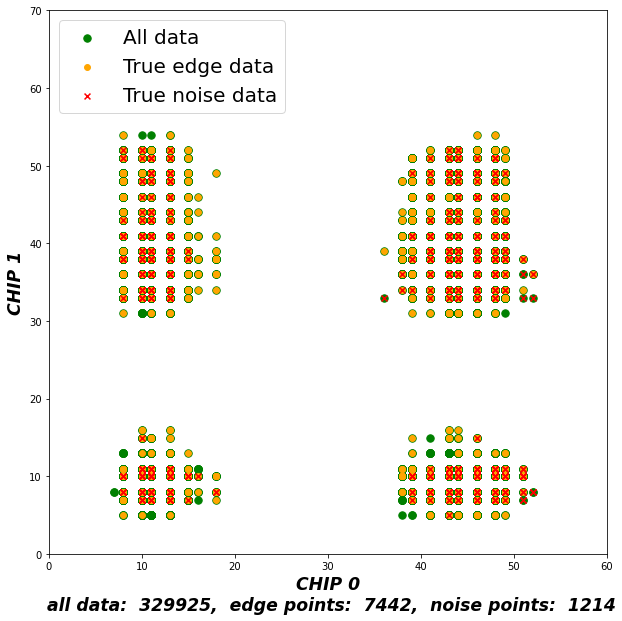

In [64]:
plt.figure(figsize=(10,10))

column1 = 0
column2 = 1

data = plt.scatter(X_edge_noise_core_combined[:, column1], X_edge_noise_core_combined[:, column2], c='green', s=55, edgecolors='green')
edge_data = plt.scatter(X_edge[:, column1], X_edge[:, column2], c='orange', s=35, edgecolors='orange')
noise_data = plt.scatter(X_noise[:, column1], X_noise[:, column2], c='red', s=35, edgecolors='red', marker='x')
# HT = plt.scatter(X_outliers[:, column1], X_outliers[:, column2], c='red', s=1, edgecolors='red')

plt.axis('tight')
plt.xlim((0, 60))
plt.ylim((0, 70))

plt.legend([data, edge_data, noise_data], ["All data", "True edge data", "True noise data"], loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=20))

plt.xlabel("CHIP {}\n all data:  {},  edge points:  {},  noise points:  {}".format(column1, len(X_edge_noise_core_combined), len(edge_ind), len(noise_ind)), fontsize='xx-large', fontstyle='oblique', fontweight='bold')
plt.ylabel("CHIP {}".format(column2), fontsize='xx-large', fontstyle='oblique', fontweight='bold')

plt.show()

In [77]:
labels_y_core = np.ones((core_datapoints.shape[0],1))
core_datapoints_labeled = np.append(core_datapoints,labels_y_core, axis=1)
print(core_datapoints_labeled.shape)
core_datapoints_labeled

(321269, 11)


array([[ 48. ,  36. , 259. , ...,  39.6,  39.6,   1. ],
       [ 44. ,  10. , 259. , ...,  30.2,  28. ,   1. ],
       [ 13. ,  34. , 261. , ...,  40.2,  42.8,   1. ],
       ...,
       [ 46. ,  10. , 259. , ...,   8.6,   8.4,   1. ],
       [ 44. ,  33. , 261. , ...,   8.8,  37.8,   1. ],
       [ 10. ,  34. , 264. , ...,  39.2,   8.2,   1. ]])

In [78]:
labels_y_edge = np.ones((X_edge.shape[0],1))
X_edge_labeled = np.append(X_edge,labels_y_edge, axis=1)
print(X_edge_labeled.shape)
X_edge_labeled

(7442, 11)


array([[ 41. ,  36. , 257. , ...,  37.6,  37. ,   1. ],
       [ 13. ,  41. , 265. , ...,  39.8,  40.4,   1. ],
       [ 41. ,   7. , 265. , ...,  30.6,  30. ,   1. ],
       ...,
       [ 39. ,  38. , 264. , ...,  29.2,  29.8,   1. ],
       [  8. ,  39. , 259. , ...,  33.6,  36.4,   1. ],
       [ 13. ,  34. , 257. , ...,  32.8,   9. ,   1. ]])

In [79]:
# Core_edge_dataset = np.vstack((core_datapoints_labeled, X_edge_labeled))
# print(Core_edge_dataset.shape)
# Core_edge_dataset

(328711, 11)


array([[ 48. ,  36. , 259. , ...,  39.6,  39.6,   1. ],
       [ 44. ,  10. , 259. , ...,  30.2,  28. ,   1. ],
       [ 13. ,  34. , 261. , ...,  40.2,  42.8,   1. ],
       ...,
       [ 39. ,  38. , 264. , ...,  29.2,  29.8,   1. ],
       [  8. ,  39. , 259. , ...,  33.6,  36.4,   1. ],
       [ 13. ,  34. , 257. , ...,  32.8,   9. ,   1. ]])

In [92]:
# Get raw data, remove noise data, remove edge data, save what remains for further actions.
train_data.drop_duplicates(inplace=True)

df1 = pd.DataFrame(X_noise, columns = ['B1', 'C1', 'A2', 'B2', 'C2', 'ma_B1', 'ma_C1', 'ma_A2', 'ma_B2', 'ma_C2'])
df2 = pd.DataFrame(X_edge , columns = ['B1', 'C1', 'A2', 'B2', 'C2', 'ma_B1', 'ma_C1', 'ma_A2', 'ma_B2', 'ma_C2'])
X_core = pd.concat([train_data, df1, df1, df2, df2]).drop_duplicates(keep=False).reset_index(drop=True)

X_core = np.r_[X_core].astype(int)

In [93]:
labels_y_all = np.ones((X_core.shape[0],1))
X_core = np.append(X_core,labels_y_all, axis=1)
X_core

array([[ 43.,  33., 265., ...,   7.,  35.,   1.],
       [ 43.,  10., 262., ...,   8.,  35.,   1.],
       [ 10.,  10., 264., ...,   8.,   9.,   1.],
       ...,
       [ 43.,  10., 262., ...,  40.,   9.,   1.],
       [ 11.,  10., 264., ...,  34.,  36.,   1.],
       [ 10.,  38., 264., ...,  37.,  32.,   1.]])

In [94]:
X_core.shape

(2991414, 11)

In [95]:
np.savetxt('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\Core_points.txt', X_core, fmt='%7.2f', delimiter=',')
np.savetxt('..\\..\\DATA\\newerrrr_DATA\\DELETE_THIS\\Edge_points.txt', X_edge, fmt='%7.2f', delimiter=',')